In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [106]:
data = pd.read_csv('AUBANK_minute.csv')

In [107]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [108]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [109]:
data.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [110]:
data.isnull().sum() 

open      0
high      0
low       0
close     0
volume    0
dtype: int64

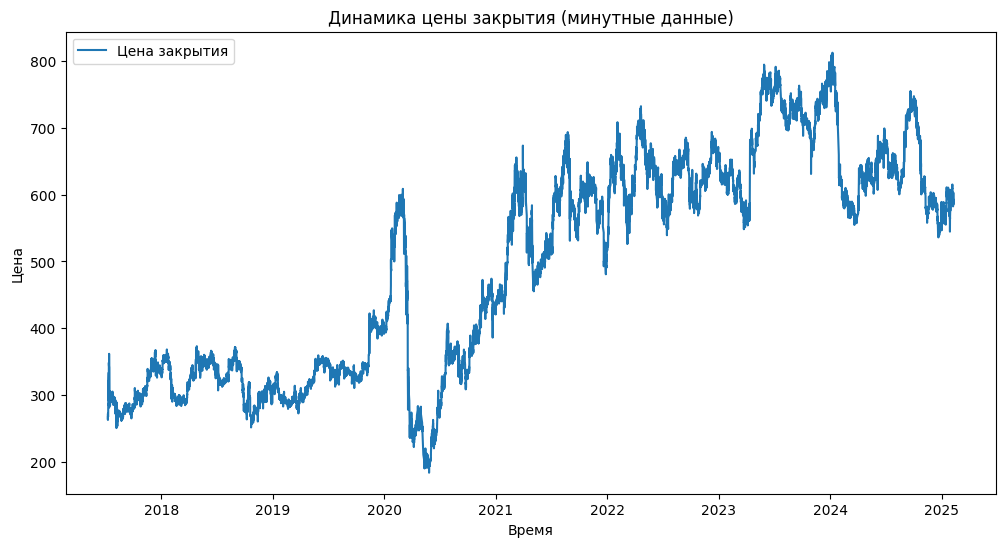

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["close"], label="Цена закрытия")
plt.title("Динамика цены закрытия (минутные данные)")
plt.xlabel("Время")
plt.ylabel("Цена")
plt.legend()
plt.show()

In [112]:
for i in range(1, 6):
    data[f'lag_{i}_close'] = data['close'].shift(i)

In [113]:
data = data.dropna().reset_index(drop=True)

features = ['open', 'high', 'low', 'volume'] + [f'lag_{i}_close' for i in range(1, 6)]
X = data[features].values.astype('float32')
Y = data['close'].values.astype('float32')


In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1))

In [115]:
test_size = 100
X_train, X_test = X_scaled[6:-test_size], X_scaled[-test_size:]
Y_train, Y_test = Y_scaled[6:-test_size], Y_scaled[-test_size:]

In [116]:
def create_model(optimizer='sgd', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    
    if optimizer == 'momentum':
        opt = SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:  
        opt = SGD(learning_rate=learning_rate, momentum=0.0)
    
    model.compile(optimizer=opt, loss='mse')
    return model

In [117]:
def plot_results(history, Y_test, Y_pred, scaler):
    
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.title('График потерь (MSE)')
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
 
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test, label='Реальные значения', marker='o')
    plt.plot(Y_pred, label='Предсказанные', linestyle='--', marker='x')
    plt.title('Реальные vs Предсказанные значения (Close)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [118]:
model = create_model(
    optimizer='sgd',
    learning_rate=0.001)

In [119]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=1)

Y_pred_scaled = model.predict(X_test)

Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = scaler.inverse_transform(Y_test)

Epoch 1/10
5483/5483 [==============================] - 4s 755us/step - loss: 0.0076
Epoch 2/10
5483/5483 [==============================] - 4s 738us/step - loss: 1.0663e-04
Epoch 3/10
5483/5483 [==============================] - 4s 735us/step - loss: 6.0366e-05
Epoch 4/10
5483/5483 [==============================] - 4s 729us/step - loss: 4.6484e-05
Epoch 5/10
5483/5483 [==============================] - 4s 733us/step - loss: 3.9455e-05
Epoch 6/10
5483/5483 [==============================] - 4s 729us/step - loss: 3.5861e-05
Epoch 7/10
5483/5483 [==============================] - 4s 736us/step - loss: 3.3625e-05
Epoch 8/10
5483/5483 [==============================] - 4s 733us/step - loss: 4.1496e-05
Epoch 9/10
5483/5483 [==============================] - 4s 738us/step - loss: 3.1143e-05
Epoch 10/10
4/4 [==============================] - 0s 998us/step


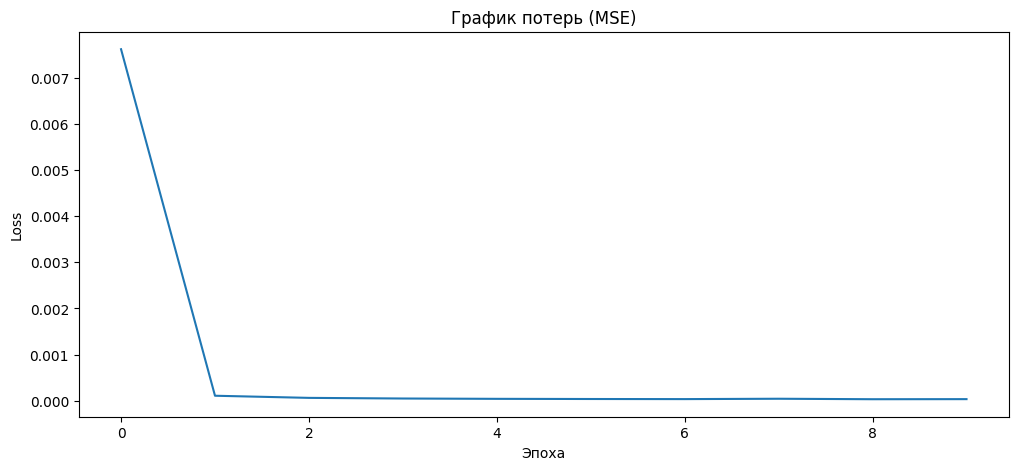

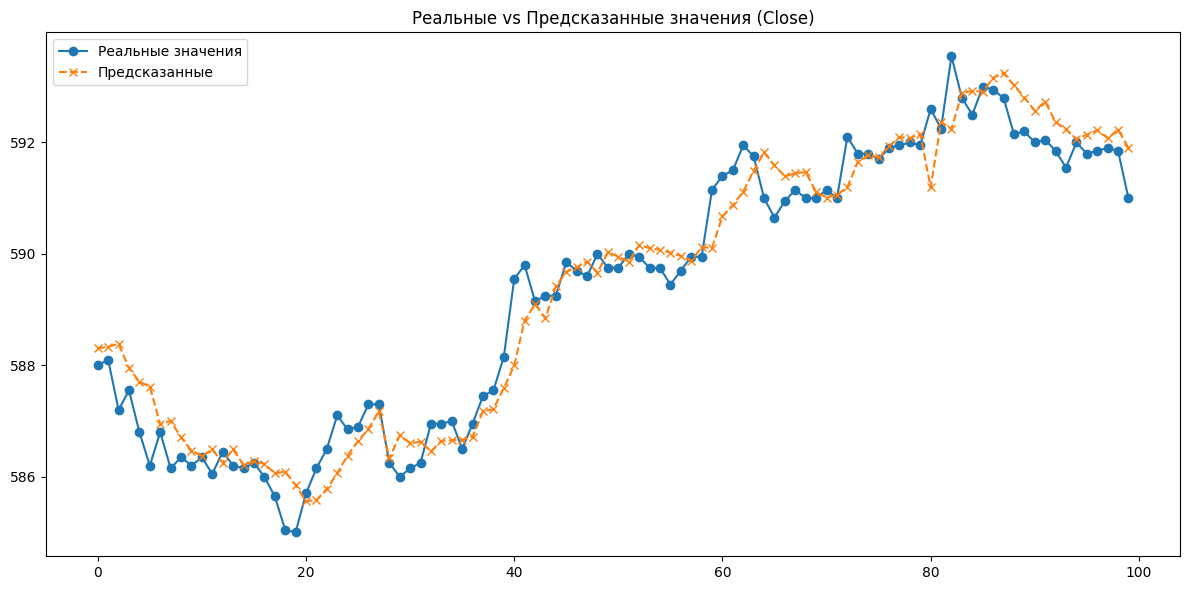

In [120]:
plot_results(history=history, Y_test=Y_test_actual, Y_pred=Y_pred, scaler=scaler)